<a href="https://colab.research.google.com/github/manaswa14/TIC-TAC-TOE/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score

In [10]:
iris = load_iris()

In [11]:
x = iris.data
y = iris.target

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)#70 train and  30% test

In [15]:
model = GaussianNB()

In [16]:
model.fit(x_train , y_train)

GaussianNB()

In [19]:
y_pred = model.predict(x_test)
print("predicted values (first 10):" ,y_pred[:10])
print("actual values (first 10):", y_test[:10])

predicted values (first 10): [1 0 2 1 1 0 1 2 1 1]
actual values (first 10): [1 0 2 1 1 0 1 2 1 1]


In [ ]:

    x_test contains the features (input data) that your model uses to make predictions. You feed x_test into the model.predict() function.
    y_pred is what your model predicts based on x_test. It's the model's guess for the target variable.
    y_test contains the actual, correct target values corresponding to x_test. It's the 'ground truth' that was held back during training.

You compare y_pred (what the model guessed) with y_test (what the answer actually is) to see how well your model performed. You don't compare y_pred with x_test because x_test is the input data, not the target variable you are trying to predict. Think of it like a student taking a test: x_test is the test questions, y_pred is the student's answers, and y_test is the answer key. You compare the student's answers to the answer key to see how well they did, not to the questions themselves.


In [20]:
cm = confusion_matrix(y_test , y_pred)
print("confusion matrix\n:" , cm)

confusion matrix
: [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [22]:
accuracy_score = accuracy_score(y_test , y_pred)
print("accuracy score is:" , accuracy_score)
error_rate = 1-accuracy_score
print("error rate is:" , error_rate)

accuracy score is: 0.9777777777777777
error rate is: 0.022222222222222254


In [24]:
precision = precision_score(y_test , y_pred , average = "macro")
print("precision:" , precision)
recall = recall_score(y_test , y_pred , average = "macro")
print("recall:" , recall)

precision: 0.9761904761904763
recall: 0.9743589743589745


In [26]:
num_classes = cm.shape[0]
metrics = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    metrics.append({'Class': i, 'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN})

metrics_df = pd.DataFrame(metrics)
print("Confusion Matrix Metrics per Class:")
display(metrics_df)

Confusion Matrix Metrics per Class:


,Class,TP,FP,FN,TN
0,0,19,0,0,26
1,1,12,0,1,32
2,2,13,1,0,31


In [27]:
data = {
    'name':['Manu' , 'Janu' , 'jon'] ,
    'age':[20,21,22]
}
df2 = pd.DataFrame(data)
print(df2)

   name  age
0  Manu   20
1  Janu   21
2   jon   22


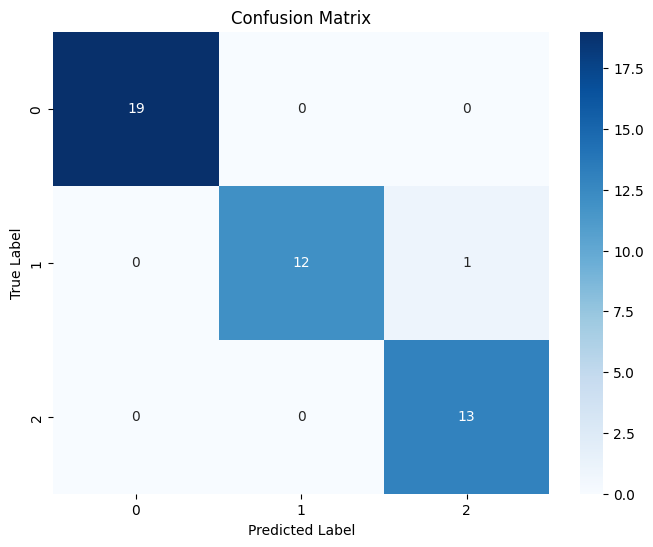

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

This heatmap visually represents your confusion matrix:

*   **Rows** represent the **actual** classes (True Label).
*   **Columns** represent the **predicted** classes (Predicted Label).
*   The numbers in each cell indicate the count of instances.
*   The **diagonal cells** (top-left to bottom-right) show the **correct predictions** (True Positives for each class).
*   **Off-diagonal cells** show the **misclassifications** (False Positives and False Negatives).

For example, `cm[0, 0]` (top-left) tells you how many instances of Class 0 were correctly predicted as Class 0.